## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
#Let's check for duplicates as well as null values and drop them if any

df.drop_duplicates(inplace = True)
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

In [3]:
#Now let's split our data using a train-test split

y = df["price"]
X = df.drop("price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17605,2738600220,8/4/2014,3,2.50,2050,4876,2.0,NO,NONE,Average,8 Good,2050,0.0,2005,0.0,98072,47.7746,-122.158,2320,4065
3490,2023069059,10/30/2014,3,3.00,2840,206910,2.0,NO,NONE,Average,10 Very Good,2840,0.0,1999,0.0,98059,47.4690,-122.063,2070,25067
19820,8669180390,6/4/2014,3,2.50,2437,5136,2.0,NO,NONE,Average,7 Average,2437,0.0,2011,0.0,98002,47.3517,-122.210,2437,4614
20955,9578060540,6/14/2014,4,2.75,2360,4924,2.0,NO,NONE,Average,8 Good,2360,0.0,2008,0.0,98028,47.7737,-122.235,2360,4670
12771,293800410,9/24/2014,4,3.50,3650,57538,2.0,NO,NONE,Average,10 Very Good,3650,0.0,1996,0.0,98077,47.7711,-122.041,3730,56257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7129,8945100050,4/24/2015,3,1.00,1460,8400,1.0,NO,NONE,Good,6 Low Average,1460,0.0,1962,0.0,98023,47.3086,-122.365,1060,8563
18336,647100096,3/31/2015,3,1.50,2230,8558,2.0,NO,NONE,Average,8 Good,2230,0.0,1960,0.0,98040,47.5833,-122.219,2200,8558
7384,8925100255,6/12/2014,4,2.50,3200,7500,1.5,NO,FAIR,Very Good,8 Good,1860,1340.0,1948,0.0,98115,47.6826,-122.274,2500,6500
1159,7533800295,8/19/2014,4,3.25,3460,7749,2.0,NO,FAIR,Average,10 Very Good,3020,440.0,1950,1998.0,98115,47.6849,-122.273,3030,8680


In [5]:
y_train

17605     451000.0
3490      790000.0
19820     285000.0
20955     525000.0
12771     824000.0
           ...    
7129      222000.0
18336     685000.0
7384     1180000.0
1159     1750000.0
9955      359999.0
Name: price, Length: 11033, dtype: float64

In [6]:
X_test

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8446,9358001590,3/3/2015,5,1.00,1880,3774,1.5,NO,NONE,Average,6 Low Average,1360,520.0,1917,0.0,98126,47.5660,-122.370,1420,2550
7473,2113700780,1/13/2015,3,1.00,1060,5000,1.0,NO,NONE,Average,7 Average,1060,0.0,1958,0.0,98106,47.5294,-122.354,1220,4600
20534,6056111063,7/31/2014,3,1.75,1140,1165,2.0,NO,NONE,Average,8 Good,1140,0.0,2014,0.0,98108,47.5638,-122.295,1150,1552
5063,8929000380,8/5/2014,3,2.50,2010,2386,2.0,NO,NONE,Average,8 Good,1390,620.0,2014,0.0,98029,47.5525,-121.998,1690,1870
17989,9826701765,8/8/2014,3,1.00,1610,7680,1.0,NO,NONE,Average,6 Low Average,900,710.0,1956,0.0,98122,47.6038,-122.303,1940,2880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12348,8099600160,4/29/2015,3,2.00,1710,10959,1.0,NO,NONE,Good,7 Average,1030,680.0,1981,0.0,98033,47.6970,-122.199,1710,10498
21245,3524039224,5/13/2014,4,2.50,3520,6773,2.5,NO,NONE,Average,9 Better,2650,870.0,2006,0.0,98136,47.5317,-122.391,2930,6458
4013,509000090,10/6/2014,3,2.50,3190,49137,2.0,NO,NONE,Average,9 Better,3190,0.0,1988,0.0,98074,47.6027,-122.043,3240,53143
5622,3101500010,4/20/2015,2,1.00,950,4000,1.0,NO,NONE,Average,6 Low Average,950,0.0,1910,0.0,98144,47.5728,-122.312,1480,4000


In [7]:
y_test

8446     340000.0
7473     320000.0
20534    230000.0
5063     479990.0
17989    715000.0
           ...   
12348    488500.0
21245    870000.0
4013     760750.0
5622     320000.0
20316    375000.0
Name: price, Length: 4729, dtype: float64

### There are alot of variables, so let's see if we can eliminate some of them based on correlation strengths.



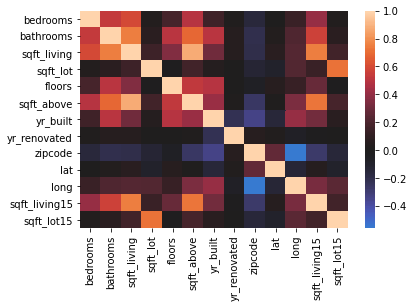

In [8]:
#Create a copy of the df, then drop id and date variable
#Then create a heatmap to see the strength of correlations. 

df_copy = X_train
df_copy = df_copy.drop(['id', "date"], axis = 1).iloc[:, 0:19]
sns.heatmap(df_copy.corr(), center = 0);

### Looking at the heatmap correlation strengths, we can eliminate some of the variables/columns in our original DF: 

* **id (not in heatmap, but is a unique identifier and will not help us in the future for predictions)**
* **date (not in heatmap, but we're worried about the future and not the past)**
* **sqft_lot**
* **view**
* **sqft_above (don't need this when we have total square footage)**
* **sqft_basement (again not in heatmap, but sqft of basement is already included in sqft_living)**
* **yr_renovated**
* **zipcode**
* **lat**
* **long (If we don't need latitude, it doesn't make sense to only put longitude)**
* **sqft_living15 (we are not concerned about other neighbor's properties)**
* **sqft_lot15 (we are not concerned about other neighbor's properties)**

In [9]:
#Dropping the above mentioned columns

X_train = X_train.drop(columns = ["id","date", "sqft_lot", "view", "sqft_above", "sqft_basement", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"])

bedrooms        10
bathrooms       26
sqft_living    785
floors           6
yr_built       116
dtype: int64

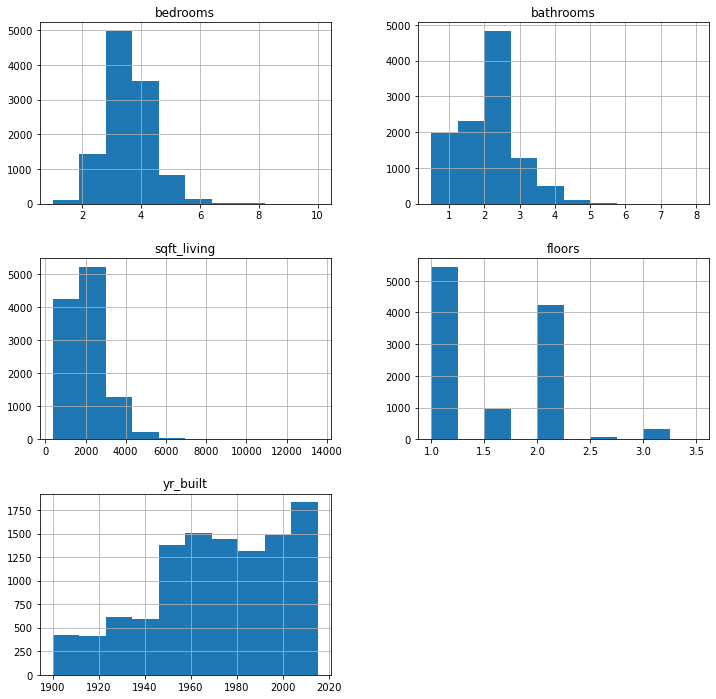

In [10]:
#Let's double check for any disguised categorical variables other than our obvious ones


X_train.hist(figsize = (12,12));

X_train[["bedrooms", "bathrooms", "sqft_living", "floors", "yr_built"]].nunique()

#### It looks like yr_built could be converted into a category type, but apart from that everything looks good. Let's also start preprocessing our categorical variables and convert them into numerical form.

### 1. The waterfront variable ###

In [11]:
X_train["waterfront"].unique()

array(['NO', 'YES'], dtype=object)

In [12]:
#As we can see there are 2 values in the waterfont column: "NO", and "YES"
#Let's convert the waterfront values into numerical categories where 0 represents "NO" and 1 represents "YES"

X_train["waterfront"] = X_train["waterfront"].astype("category").cat.codes
#Let's check it worked
X_train

,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,yr_built
17605,3,2.50,2050,2.0,0,Average,8 Good,2005
3490,3,3.00,2840,2.0,0,Average,10 Very Good,1999
19820,3,2.50,2437,2.0,0,Average,7 Average,2011
20955,4,2.75,2360,2.0,0,Average,8 Good,2008
12771,4,3.50,3650,2.0,0,Average,10 Very Good,1996
...,...,...,...,...,...,...,...,...
7129,3,1.00,1460,1.0,0,Good,6 Low Average,1962
18336,3,1.50,2230,2.0,0,Average,8 Good,1960
7384,4,2.50,3200,1.5,0,Very Good,8 Good,1948
1159,4,3.25,3460,2.0,0,Average,10 Very Good,1950


### 2. The condition variable ###

In [13]:
X_train["condition"].unique()

array(['Average', 'Good', 'Very Good', 'Fair', 'Poor'], dtype=object)

In [14]:
#No null values here, so let's do the same thing as we did with waterfront

X_train["condition"] = X_train["condition"].astype("category").cat.codes
X_train["condition"].unique()

array([0, 2, 4, 1, 3], dtype=int8)

In [15]:
X_train

,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,yr_built
17605,3,2.50,2050,2.0,0,0,8 Good,2005
3490,3,3.00,2840,2.0,0,0,10 Very Good,1999
19820,3,2.50,2437,2.0,0,0,7 Average,2011
20955,4,2.75,2360,2.0,0,0,8 Good,2008
12771,4,3.50,3650,2.0,0,0,10 Very Good,1996
...,...,...,...,...,...,...,...,...
7129,3,1.00,1460,1.0,0,2,6 Low Average,1962
18336,3,1.50,2230,2.0,0,0,8 Good,1960
7384,4,2.50,3200,1.5,0,4,8 Good,1948
1159,4,3.25,3460,2.0,0,0,10 Very Good,1950


### 3. The grade variable ###

In [16]:
X_train["grade"].unique()

array(['8 Good', '10 Very Good', '7 Average', '6 Low Average', '9 Better',
       '11 Excellent', '5 Fair', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor'], dtype=object)

In [17]:
#We only want the number scores, and not the description.
#Let's create a function to edit the string entries
def keep_numbs(string):
    new_string = ''
    for i in string:
        if i.isdigit():
            new_string = new_string + i
    return new_string

In [18]:
X_train["grade"] = X_train["grade"].apply(keep_numbs)
X_train["grade"] = pd.to_numeric(X_train["grade"])

In [19]:
X_train

,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,yr_built
17605,3,2.50,2050,2.0,0,0,8,2005
3490,3,3.00,2840,2.0,0,0,10,1999
19820,3,2.50,2437,2.0,0,0,7,2011
20955,4,2.75,2360,2.0,0,0,8,2008
12771,4,3.50,3650,2.0,0,0,10,1996
...,...,...,...,...,...,...,...,...
7129,3,1.00,1460,1.0,0,2,6,1962
18336,3,1.50,2230,2.0,0,0,8,1960
7384,4,2.50,3200,1.5,0,4,8,1948
1159,4,3.25,3460,2.0,0,0,10,1950


In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11033 entries, 17605 to 9955
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     11033 non-null  int64  
 1   bathrooms    11033 non-null  float64
 2   sqft_living  11033 non-null  int64  
 3   floors       11033 non-null  float64
 4   waterfront   11033 non-null  int8   
 5   condition    11033 non-null  int8   
 6   grade        11033 non-null  int64  
 7   yr_built     11033 non-null  int64  
dtypes: float64(2), int64(4), int8(2)
memory usage: 624.9 KB


### 4. The yr_built variable ###

In [21]:
X_train["yr_built"].unique()

array([2005, 1999, 2011, 2008, 1996, 1984, 1965, 1916, 2012, 1937, 1920,
       1909, 1955, 2006, 1954, 1961, 1998, 1952, 1978, 1950, 2004, 1992,
       1949, 1939, 1973, 1918, 1968, 1966, 1912, 1980, 1977, 2001, 1960,
       2014, 2013, 1940, 1914, 1917, 2003, 1986, 1941, 1990, 1995, 1945,
       1967, 1953, 1970, 1985, 1951, 1969, 1931, 1959, 2000, 1987, 1905,
       1976, 1962, 2002, 1975, 1942, 1943, 1983, 1927, 1908, 1963, 1928,
       1958, 1997, 1991, 1988, 1971, 1994, 1929, 1948, 1925, 1903, 1979,
       1938, 1911, 1947, 1944, 1900, 1974, 2007, 1946, 1957, 1906, 1981,
       1921, 1926, 1964, 1933, 1922, 1982, 2009, 1956, 1904, 1913, 1989,
       1910, 1930, 2010, 1907, 1924, 1993, 1919, 1923, 1932, 1972, 1935,
       1936, 1902, 1934, 1915, 1901, 2015], dtype=int64)

In [22]:
X_train["yr_built"] = X_train["yr_built"].astype("category").cat.codes
X_train["yr_built"].unique()

array([105,  99, 111, 108,  96,  84,  65,  16, 112,  37,  20,   9,  55,
       106,  54,  61,  98,  52,  78,  50, 104,  92,  49,  39,  73,  18,
        68,  66,  12,  80,  77, 101,  60, 114, 113,  40,  14,  17, 103,
        86,  41,  90,  95,  45,  67,  53,  70,  85,  51,  69,  31,  59,
       100,  87,   5,  76,  62, 102,  75,  42,  43,  83,  27,   8,  63,
        28,  58,  97,  91,  88,  71,  94,  29,  48,  25,   3,  79,  38,
        11,  47,  44,   0,  74, 107,  46,  57,   6,  81,  21,  26,  64,
        33,  22,  82, 109,  56,   4,  13,  89,  10,  30, 110,   7,  24,
        93,  19,  23,  32,  72,  35,  36,   2,  34,  15,   1, 115],
      dtype=int8)

In [23]:
X_train

,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,yr_built
17605,3,2.50,2050,2.0,0,0,8,105
3490,3,3.00,2840,2.0,0,0,10,99
19820,3,2.50,2437,2.0,0,0,7,111
20955,4,2.75,2360,2.0,0,0,8,108
12771,4,3.50,3650,2.0,0,0,10,96
...,...,...,...,...,...,...,...,...
7129,3,1.00,1460,1.0,0,2,6,62
18336,3,1.50,2230,2.0,0,0,8,60
7384,4,2.50,3200,1.5,0,4,8,48
1159,4,3.25,3460,2.0,0,0,10,50


## Let's preprocess our test data ##

In [24]:
# Remove the same columns as we did for X_test
X_test = X_test.drop(columns = ["id","date", "sqft_lot", "view", "sqft_above", "sqft_basement", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"])
X_test

,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,yr_built
8446,5,1.00,1880,1.5,NO,Average,6 Low Average,1917
7473,3,1.00,1060,1.0,NO,Average,7 Average,1958
20534,3,1.75,1140,2.0,NO,Average,8 Good,2014
5063,3,2.50,2010,2.0,NO,Average,8 Good,2014
17989,3,1.00,1610,1.0,NO,Average,6 Low Average,1956
...,...,...,...,...,...,...,...,...
12348,3,2.00,1710,1.0,NO,Good,7 Average,1981
21245,4,2.50,3520,2.5,NO,Average,9 Better,2006
4013,3,2.50,3190,2.0,NO,Average,9 Better,1988
5622,2,1.00,950,1.0,NO,Average,6 Low Average,1910


In [25]:
#Convert our categorical variables into numeric

X_test["waterfront"] = X_test["waterfront"].astype("category").cat.codes

X_test["condition"] = X_test["condition"].astype("category").cat.codes

X_test["grade"] = X_test["grade"].apply(keep_numbs)
X_test["grade"] = pd.to_numeric(X_test["grade"])

X_test["yr_built"] = X_test["yr_built"].astype("category").cat.codes


In [26]:
X_test.info()
X_test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4729 entries, 8446 to 20316
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     4729 non-null   int64  
 1   bathrooms    4729 non-null   float64
 2   sqft_living  4729 non-null   int64  
 3   floors       4729 non-null   float64
 4   waterfront   4729 non-null   int8   
 5   condition    4729 non-null   int8   
 6   grade        4729 non-null   int64  
 7   yr_built     4729 non-null   int8   
dtypes: float64(2), int64(3), int8(3)
memory usage: 235.5 KB


,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,yr_built
8446,5,1.00,1880,1.5,0,0,6,17
7473,3,1.00,1060,1.0,0,0,7,58
20534,3,1.75,1140,2.0,0,0,8,114
5063,3,2.50,2010,2.0,0,0,8,114
17989,3,1.00,1610,1.0,0,0,6,56
...,...,...,...,...,...,...,...,...
12348,3,2.00,1710,1.0,0,2,7,81
21245,4,2.50,3520,2.5,0,0,9,106
4013,3,2.50,3190,2.0,0,0,9,88
5622,2,1.00,950,1.0,0,0,6,10


## Let's build and evaluate our model ##

#Create an instane of Linear Regression
model = LinearRegression()

#Train our model
model.fit(X_train, y_train)

#Generate predictions
y_pred = model.predict(X_test)

#Obtain R-squared squares and the MSE
print("The R-Squared score is:", r2_score(y_test, y_pred))
print("The Mean Squared Error is:", mean_squared_error(y_test, y_pred, squared = False))

In [28]:
#Let's find the coefficients and intercepts

#Finding coefficients
print(pd.Series(model.coef_, index=X_train.columns, name="Coefficients"))

#Finding the intercept
print("\n Intercept: ", model.intercept_)

bedrooms       -49250.574133
bathrooms       55394.518025
sqft_living       195.266517
floors          21973.720796
waterfront     710147.902097
condition        8656.379722
grade          123213.592059
yr_built        -3963.511886
Name: Coefficients, dtype: float64

 Intercept:  -523715.3768942193
